In [1]:
from confer.utils import str_to_path
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from rep.utils_data import SourceData

sns.set()
sns.color_palette("colorblind", 8)
# sns.set_context("poster")
sns.set_style("whitegrid")
mpl.rcParams["legend.loc"] = "upper right"
FONT_SIZE = 35
params = {
    "axes.labelsize": FONT_SIZE,  # fontsize for x and y labels (was 10)
    "axes.titlesize": FONT_SIZE,
    "font.size": FONT_SIZE,  # was 10
    "legend.fontsize": FONT_SIZE,  # was 10
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    "font.family": "Times New Roman",
}
mpl.rcParams.update(params)


In [2]:
def filter(files, model_type, init, emb_tpe="bayes", days="90", season="1",emb_pos="first"):
    return [
        f
        for f in files
        if model_type in f
        and f"embType_{emb_tpe}_" in f
        and f"numDays_{days}" in f
        and init in f
        and park_name in f
        and f"curSeason_{season}" in f
        and emb_pos in f
    ]


def read_df(f):
    df = pd.read_csv(f, sep=";")
    df.columns = ["TimeUTC", "PowerGeneration", "Preds"]
    df.TimeUTC = pd.to_datetime(df.TimeUTC, infer_datetime_format=True, utc=True)
    df.set_index("TimeUTC", inplace=True)
    return df



In [17]:
def filter_by_park(files, park_name, days="90", season="1", first_filter="", second_filter=""):
    return [
        f
        for f in files
        if f"numDays_{days}" in f
        and park_name + "_" in f
        and f"curSeason_{season}" in f
        and first_filter in f
        and second_filter in f
        and "ftType_emb_only" in f
    ]


In [4]:
def add_naming_columns(cur_df, cur_file):
    cur_df["Model"] = cur_file[0:3].upper()
    cur_df["Type"] = "Normal" if "normal" in cur_file.lower() else "Bayes"
    cur_df["EmbPos"] = "First" if "first" in cur_file.lower() else "All"
    return cur_df


def add_naming_columns_inductive_tl(cur_df, cur_file):
    cur_df = add_naming_columns(cur_df, cur_file)
    cur_df["Init"] = "Copy" if "copy" in cur_file.lower() else "Default"
    return cur_df

In [5]:
FONT_SIZE = 25
params = {
    "axes.labelsize": FONT_SIZE,  # fontsize for x and y labels (was 10)
    "axes.titlesize": FONT_SIZE,
    "font.size": FONT_SIZE,  # was 10
    "legend.fontsize": FONT_SIZE,  # was 10
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    "font.family": "Times New Roman",
}
mpl.rcParams.update(params)

tcn_wf26
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_normal_numDays_90_residual_first_embAdaption_copy_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_bayes_numDays_90_residual_first_embAdaption_copy_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_normal_numDays_90_residual_all_embAdaption_copy_ftType_emb_only_curSeason_1.csv
--


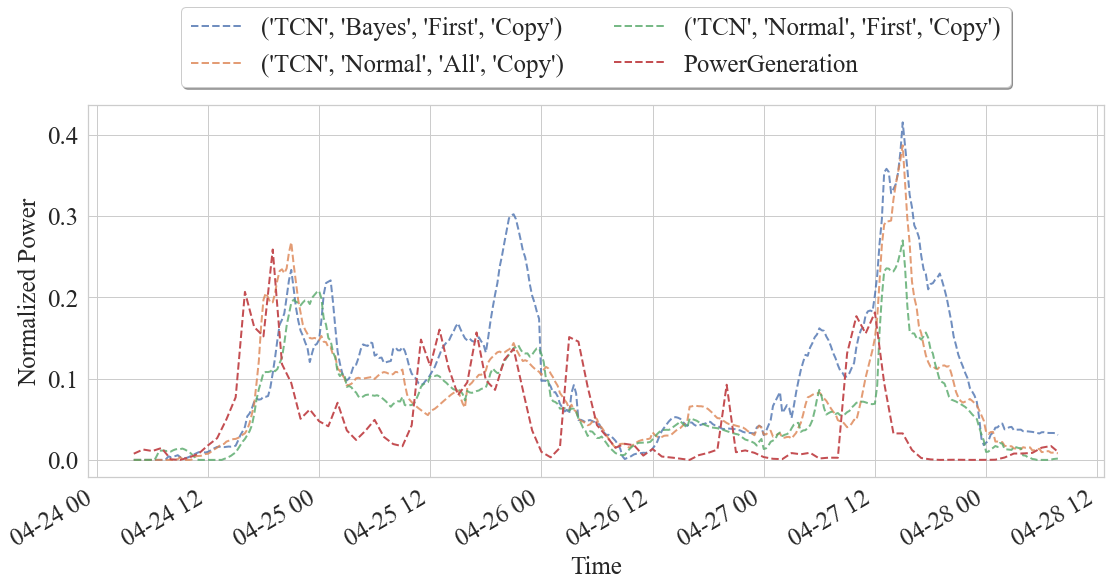

tcn_wf26
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_normal_numDays_90_residual_all_embAdaption_reset_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_bayes_numDays_90_residual_all_embAdaption_reset_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_normal_numDays_90_residual_first_embAdaption_reset_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/tcn_wf26_fullBayes_False_embType_bayes_numDays_90_residual_first_embAdaption_reset_ftType_emb_only_curSeason_1.csv
--


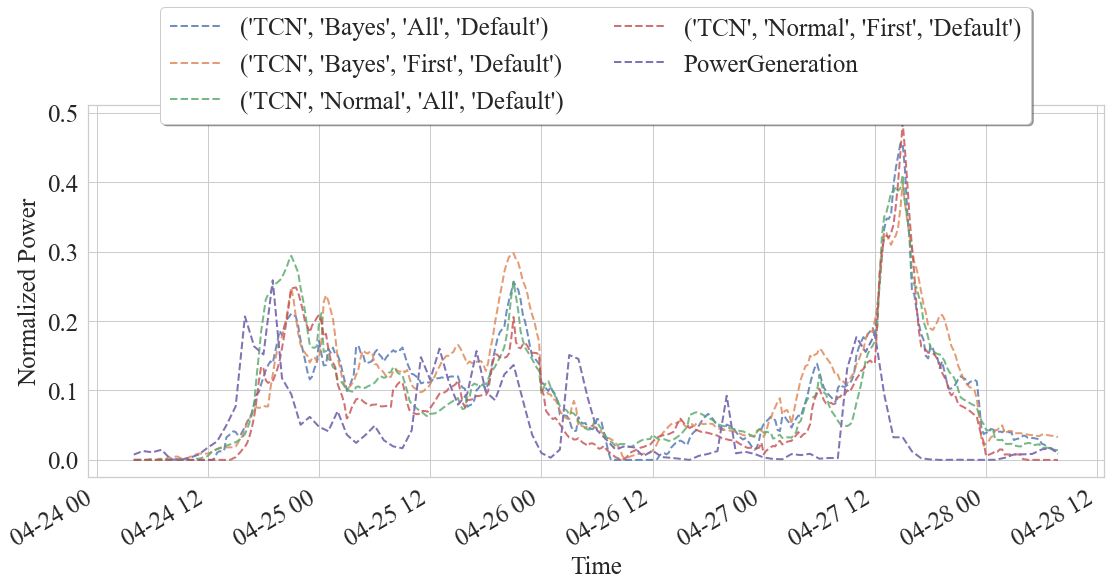

mlp_wf26
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/mlp_wf26_fullBayes_False_embType_normal_numDays_90_residual_first_embAdaption_copy_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/mlp_wf26_fullBayes_False_embType_bayes_numDays_90_residual_first_embAdaption_copy_ftType_emb_only_curSeason_1.csv
--


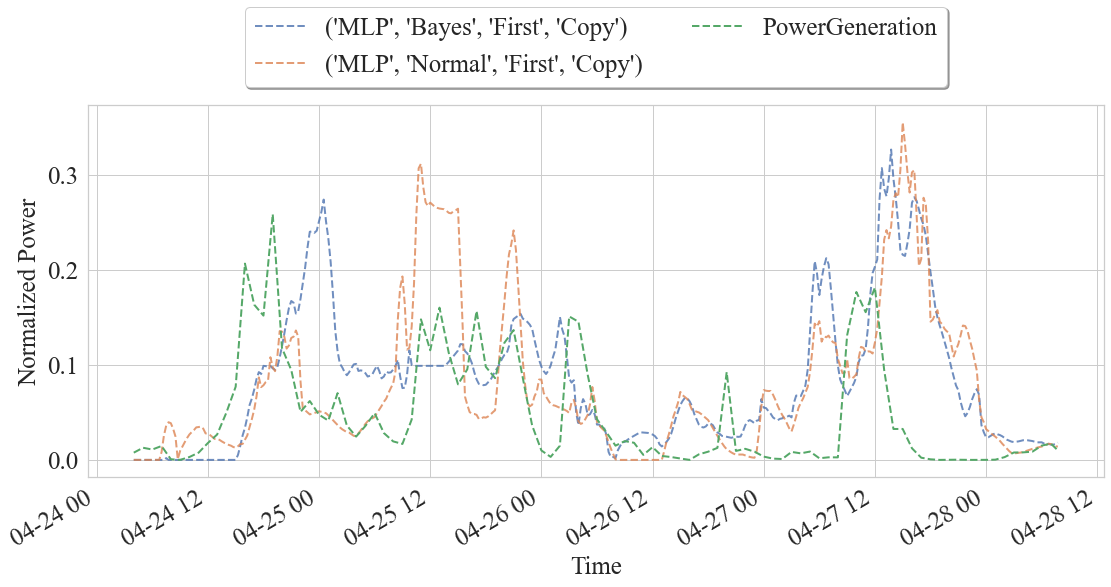

mlp_wf26
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/mlp_wf26_fullBayes_False_embType_normal_numDays_90_residual_first_embAdaption_reset_ftType_emb_only_curSeason_1.csv
/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/mlp_wf26_fullBayes_False_embType_bayes_numDays_90_residual_first_embAdaption_reset_ftType_emb_only_curSeason_1.csv
--


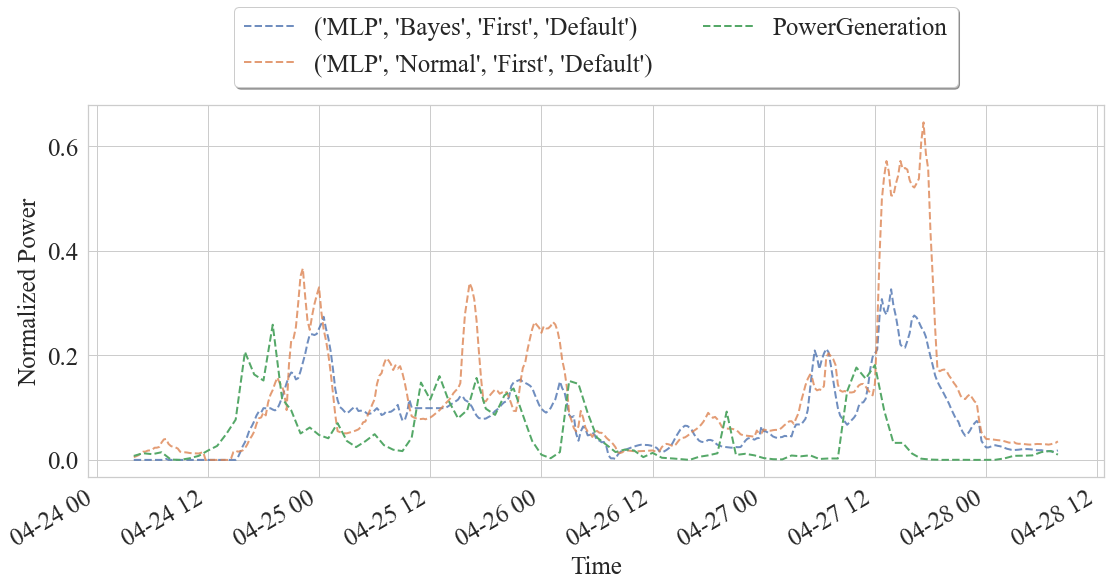

In [38]:
base_folder = "../results/2015_wind/preds/"
base_folder = "/mnt/1B5D7DBC354FB150/res_task_tcn/2015_wind/preds/"
data_folder = "~/data/prophesy-data/WindSandbox2015/"

files = glob.glob(base_folder + "/*.csv")

# park_name = "_wf14"
park_name = "_wf26"
col = "Preds"

for model in ["tcn"+park_name, "mlp"+park_name]:
    for init in ["copy", "reset"]:
        files_by_park = []
        files_by_park = filter_by_park(files, park_name, days="90", first_filter=init, second_filter=model, season="1")
        print(model)
        for f in files_by_park:
            print(f)
        print("--")
        dfs= []
        for f in files_by_park:
            df = read_df(f)
            add_naming_columns_inductive_tl(df, f.split("/")[-1])
            dfs.append(df)

        start=10000
        length_plot=400
        end = start+length_plot
        _df = pd.concat([_t[start:end] for _t in dfs])
        plt.figure(figsize=(16,9))
        for k,__df in _df.groupby(["Model", "Type", "EmbPos", "Init"]):
            plt.plot(__df[col], "--", label=k, linewidth=2, alpha=0.8)
        
        dfs[0][start:end]["PowerGeneration"].plot(figsize=(16, 9), style="--", linewidth=2)

        plt.ylabel("Normalized Power")
        plt.xlabel("Time")
        plt.legend(
            loc="upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=2,
            fancybox=True,
            shadow=True,
            )
        plt.tight_layout()
        model_name = model.replace(park_name,"")
        plt.savefig(f"../doc/figs/sample_forecast_wind_{model_name}_{init}.pdf")
        plt.show()
        plt.close()

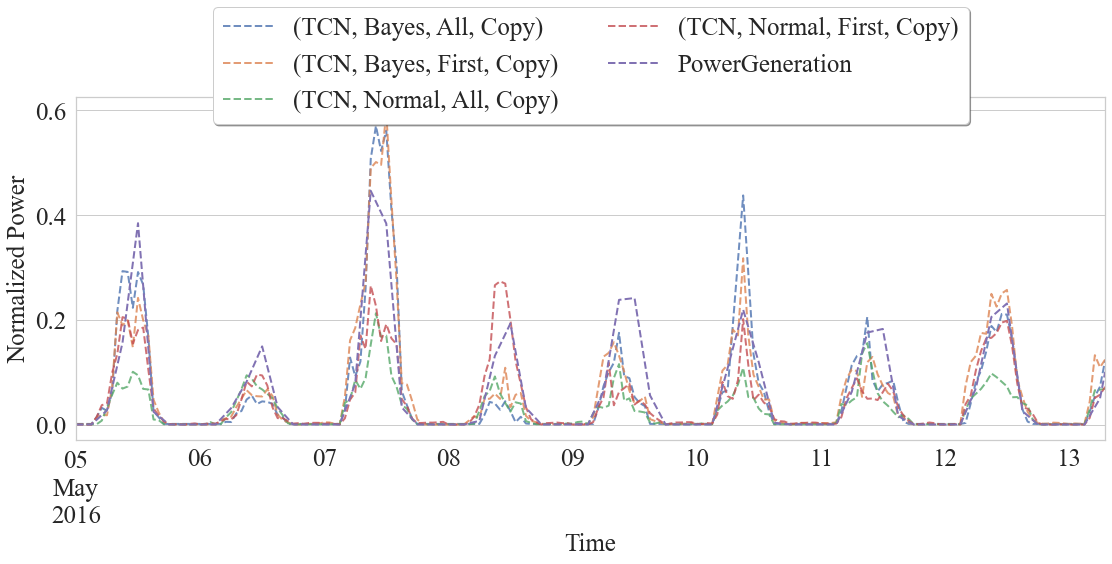

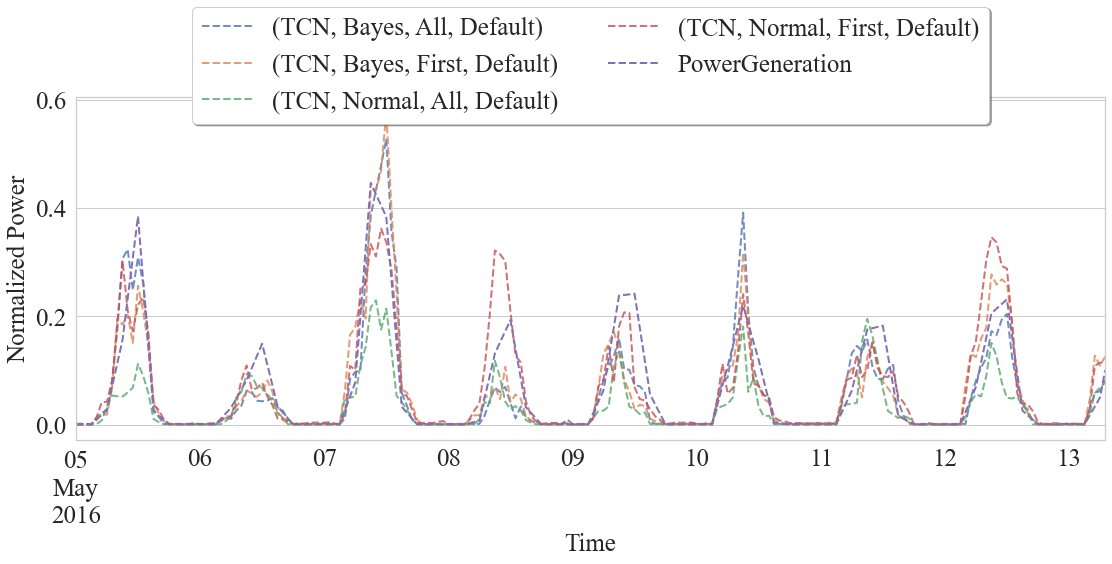

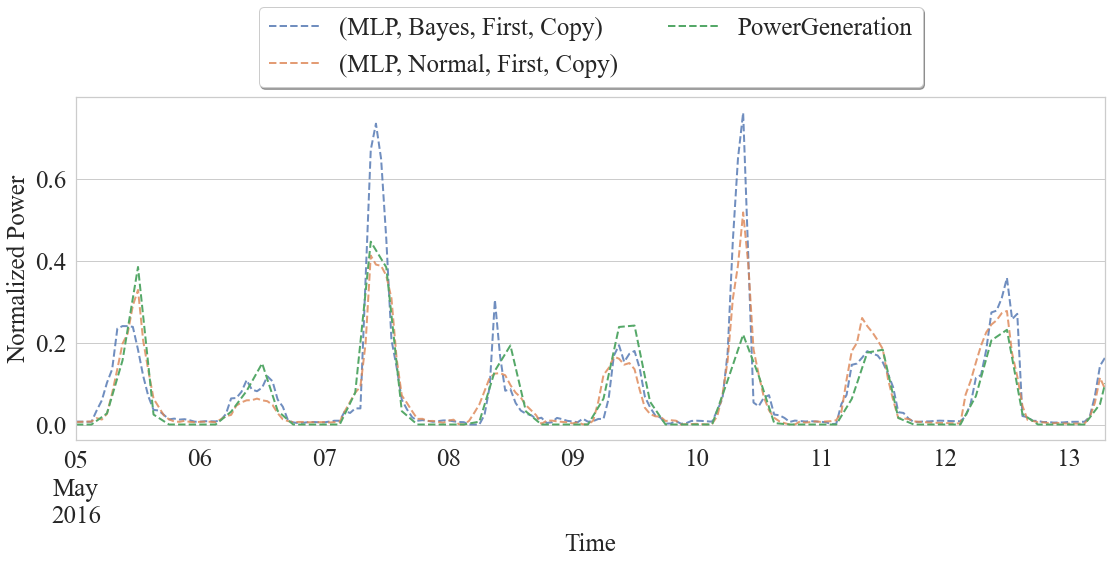

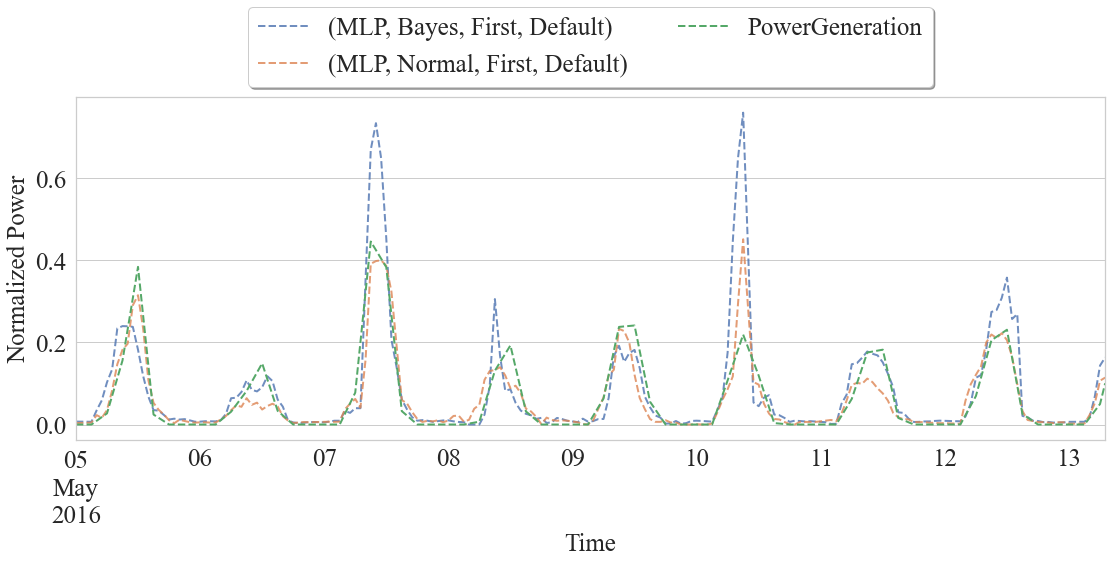

In [36]:
base_folder = "../results/2015_pv/preds/"
base_folder = "/mnt/1B5D7DBC354FB150/res_task_tcn/2015_pv/preds/"

files = glob.glob(base_folder + "/*.csv")

park_name = "pv_05"
col = "Preds"

for model in ["tcn_pv", "mlp_pv"]:
    for init in ["copy", "reset"]:
        files_by_park = filter_by_park(files, park_name, days="90", first_filter=init, second_filter=model)
        dfs= []
        for f in files_by_park:
            df = read_df(f)
            add_naming_columns_inductive_tl(df, f.split("/")[-1])
            dfs.append(df)

        start=3000
        length_plot=200
        end = start+length_plot
        _df = pd.concat([_t[start:end] for _t in dfs])
        ax = _df.groupby(["Model", "Type", "EmbPos", "Init"])[col].plot(figsize=(16, 9), style="--", linewidth=2, alpha=0.8)
        dfs[0][start:end]["PowerGeneration"].plot(figsize=(16, 9), style="--", linewidth=2)

        plt.ylabel("Normalized Power")
        plt.xlabel("Time")
        plt.legend(
            loc="upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=2,
            fancybox=True,
            shadow=True,
        )
        model_name = model.replace("__pv","")
        plt.tight_layout()
        plt.savefig(f"../doc/figs/sample_forecast_pv_{model_name}_{init}.pdf")
        plt.show()
        plt.close()